In [ ]:
%pip install pandas

**Task 1**

In [3]:
import pandas as pd
data = {
    'Name':['Alice','bilal','Abdullah','junaid'],
    'Age':[23,45,67,14],
    'city':['Lahore','Faisalabad','Karachi','Multan'],
    'Salary':[40000,50000,60000,70000]
}

df=pd.DataFrame(data)
print("Manual Data\n")
print(df)

Manual Data

       Name  Age        city  Salary
0     Alice   23      Lahore   40000
1     bilal   45  Faisalabad   50000
2  Abdullah   67     Karachi   60000
3    junaid   14      Multan   70000


**Task 2**

In [9]:
import pandas as pd

data_url='https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv'
df=pd.read_csv(data_url)
print(df.head())


         Date Country/Region Province/State  Confirmed  Recovered  Deaths
0  2020-01-22    Afghanistan            NaN          0        0.0       0
1  2020-01-23    Afghanistan            NaN          0        0.0       0
2  2020-01-24    Afghanistan            NaN          0        0.0       0
3  2020-01-25    Afghanistan            NaN          0        0.0       0
4  2020-01-26    Afghanistan            NaN          0        0.0       0


In [ ]:
%pip install numpy


**Task 3**

In [7]:
import pandas as pd
import numpy as np

np.random.seed(42)
data={
    'ID':range(1,101),
    'score':np.random.randint(50,100,100),
    'Height':np.random.normal(170,10,100).round(1),
    'Weight':np.random.normal(70,5,100).round(1)


}

df=pd.DataFrame(data)
df.head()

,ID,score,Height,Weight
0,1,88,151.2,64.9
1,2,78,156.3,73.7
2,3,64,176.4,61.4
3,4,92,160.9,70.6
4,5,57,174.8,75.0


**Task 4**

In [6]:
from sklearn.preprocessing import LabelEncoder

data={
    'A':[1,2,None,4,5],
    'B':[6,None, 8,9,10],
    'C':[11,12,13,None,15]
}

df2=pd.DataFrame(data)
print("Original Data Frame:\n")
print(df2)

Original Data Frame:

     A     B     C
0  1.0   6.0  11.0
1  2.0   NaN  12.0
2  NaN   8.0  13.0
3  4.0   9.0   NaN
4  5.0  10.0  15.0


In [ ]:
%pip install scikit-learn

**Task 5**

In [8]:
mapping={'h':1,'u':2,'t':3}
features=pd.DataFrame({'Type':['h','u','t','h','u']})
features['Type']=features['Type'].map(mapping)
print("\nEncoded Types")
print(features.groupby('Type').size())



Encoded Types
Type
1    2
2    2
3    1
dtype: int64


**Task 6**

In [1]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

features_df=pd.DataFrame({'Regionname':['East','West','North','South','East']})

le=LabelEncoder()

features_df['Region']=le.fit_transform(features_df['Regionname'])


print("\nLabel Encoded Region \n")
print(features_df.value_counts())


Label Encoded Region 

Regionname  Region
East        0         2
North       1         1
South       2         1
West        3         1
Name: count, dtype: int64


**Task 7**

In [2]:
features=pd.DataFrame({
            'method':['method1','method2','method1','method3','method2']})
df_one_hot=pd.get_dummies(features,columns=['method'])

print("\nOne-Hot Encoded DataFrame\n")
print(df_one_hot.value_counts())


One-Hot Encoded DataFrame

method_method1  method_method2  method_method3
False           True            False             2
True            False           False             2
False           False           True              1
Name: count, dtype: int64


**Task 8**

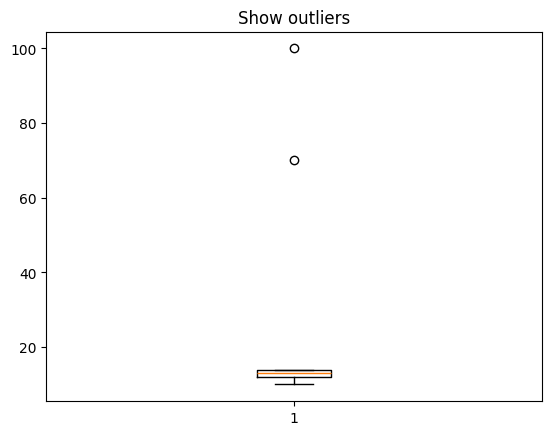

In [5]:
import matplotlib.pyplot as plt

data=[10,12,11,13,13,14,70,13,100]

plt.boxplot(data)
plt.title("Show outliers")
plt.show()


In [ ]:
%pip install matplotlib

**ACTIVITY 1**

In [6]:
##1
import pandas as pd
data = {
    "Province": ["Punjab", "Sindh", "Khyber Pakhtunkhwa", "Balochistan"],
    "Population (millions)": [110, 47, 35, None],  
    "Literacy Rate (%)": [64, 58, None, 46],       
    "Region": ["East", "South", "North", "West"]
}


df=pd.DataFrame(data)
df

,Province,Population (millions),Literacy Rate (%),Region
0,Punjab,110.0,64.0,East
1,Sindh,47.0,58.0,South
2,Khyber Pakhtunkhwa,35.0,NaN,North
3,Balochistan,NaN,46.0,West


In [9]:
##2
df.isnull().sum()

df=df.dropna(subset=['Population (millions)'])

median_lit=df['Literacy Rate (%)'].median()
df.loc[:,'Literacy Rate (%)']=df['Literacy Rate (%)'].fillna(median_lit)


In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df.loc[:,'Region_Label']=le.fit_transform(df['Region'])

In [11]:
df

,Province,Population (millions),Literacy Rate (%),Region,Region_Label
0,Punjab,110.0,64.0,East,0
1,Sindh,47.0,58.0,South,2
2,Khyber Pakhtunkhwa,35.0,61.0,North,1


In [12]:
df=pd.get_dummies(df,columns=['Region']).copy()


In [13]:
df

,Province,Population (millions),Literacy Rate (%),Region_Label,Region_East,Region_North,Region_South
0,Punjab,110.0,64.0,0,True,False,False
1,Sindh,47.0,58.0,2,False,False,True
2,Khyber Pakhtunkhwa,35.0,61.0,1,False,True,False


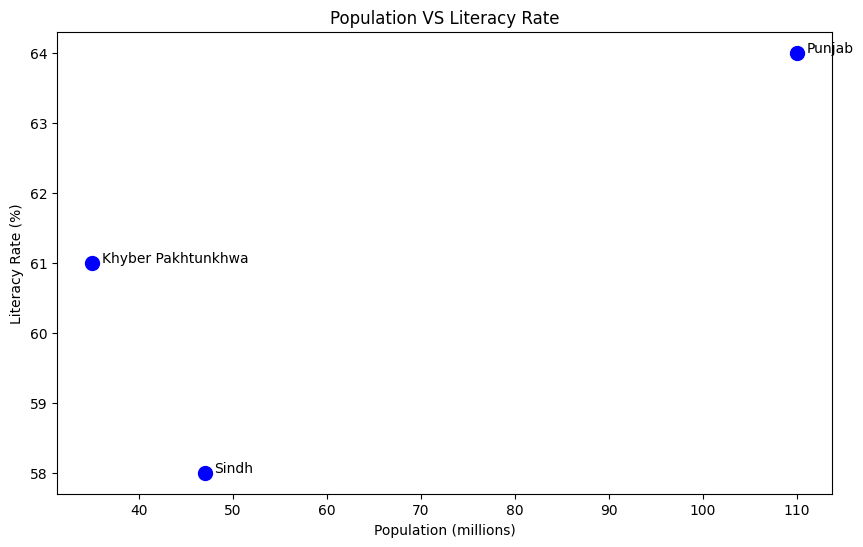

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df['Population (millions)'],df['Literacy Rate (%)'],c='blue',s=100)

for i in range(len(df)):
    x = df["Population (millions)"].iloc[i]
    y = df["Literacy Rate (%)"].iloc[i]
    name = df["Province"].iloc[i]
    plt.text(x + 1, y, name, fontsize=10)  

plt.title("Population VS Literacy Rate")
plt.xlabel("Population (millions)")
plt.ylabel("Literacy Rate (%)")
plt.show()

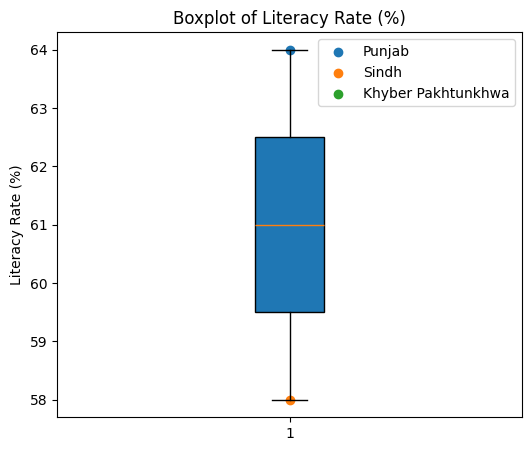

In [15]:
plt.figure(figsize=(6,5))
plt.boxplot(df["Literacy Rate (%)"], vert=True, patch_artist=True)
for i, row in df.iterrows():
    plt.scatter(1, row["Literacy Rate (%)"], label=row["Province"])

plt.title("Boxplot of Literacy Rate (%)")
plt.ylabel("Literacy Rate (%)")
plt.legend()
plt.show()

**Activity 2**

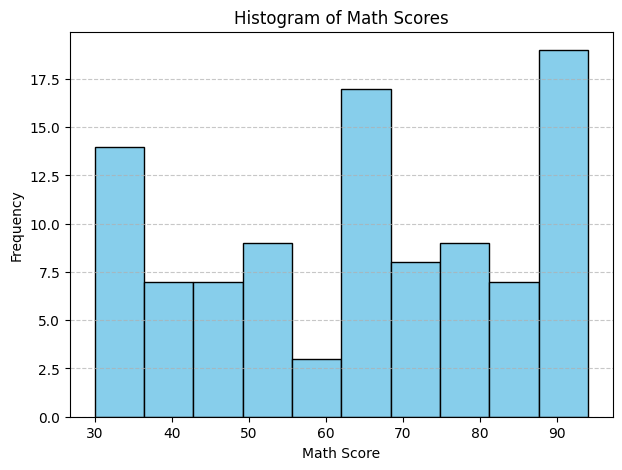

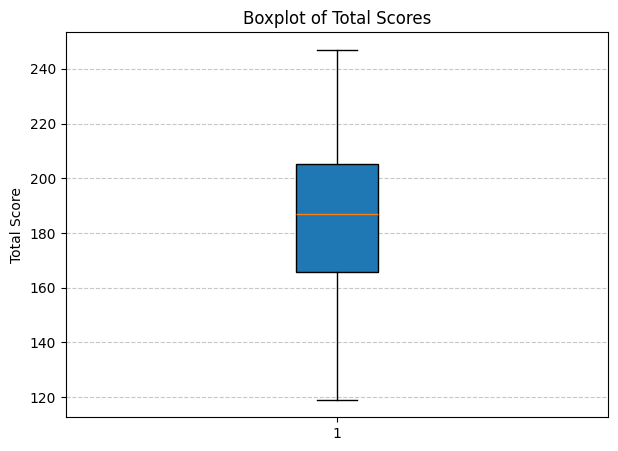

Outlier Students in Total Score:
 Empty DataFrame
Columns: [ID, Total, Grade]
Index: []

Average Total Score by Grade:
 Grade
C    188.416374
A    186.080972
B    183.813464
Name: Total, dtype: float64


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

np.random.seed(42)

data = {
    "ID": range(1, 101),
    "Math": np.random.randint(30, 100, 100).astype(float),
    "Science": np.random.randint(35, 95, 100).astype(float),
    "English": np.random.randint(25, 90, 100).astype(float),
    "Grade": np.random.choice(["A", "B", "C"], 100, p=[0.3, 0.5, 0.2])
}
df = pd.DataFrame(data)

for col in ["Math", "Science", "English"]:
    df.loc[np.random.choice(df.index, 5, replace=False), col] = np.nan

df.fillna(df.mean(numeric_only=True), inplace=True)

le = LabelEncoder()
df["Grade_encoded"] = le.fit_transform(df["Grade"])

plt.figure(figsize=(7,5))
plt.hist(df["Math"], bins=10, color="skyblue", edgecolor="black")
plt.title("Histogram of Math Scores")
plt.xlabel("Math Score")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

df["Total"] = df[["Math", "Science", "English"]].sum(axis=1)

plt.figure(figsize=(7,5))
plt.boxplot(df["Total"], vert=True, patch_artist=True)
plt.title("Boxplot of Total Scores")
plt.ylabel("Total Score")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Q1 = df["Total"].quantile(0.25)
Q3 = df["Total"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Total"] < lower_bound) | (df["Total"] > upper_bound)]

print("Outlier Students in Total Score:\n", outliers[["ID", "Total", "Grade"]])

summary = df.groupby("Grade")["Total"].mean().sort_values(ascending=False)
print("\nAverage Total Score by Grade:\n", summary)


**ACTIVITY 3**

In [5]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv"
df1 = pd.read_csv(url)
df1.head()

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0


In [6]:
df1.isnull().sum()

Date                   0
Country/Region         0
Province/State    159120
Confirmed              0
Recovered          13056
Deaths                 0
dtype: int64

In [9]:
Pakistan_data=df1[df1["Country/Region"]=="Pakistan"].copy()
Pakistan_data

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
168912,2020-01-22,Pakistan,NaN,0,0.0,0
168913,2020-01-23,Pakistan,NaN,0,0.0,0
168914,2020-01-24,Pakistan,NaN,0,0.0,0
168915,2020-01-25,Pakistan,NaN,0,0.0,0
168916,2020-01-26,Pakistan,NaN,0,0.0,0
...,...,...,...,...,...,...
169723,2022-04-12,Pakistan,NaN,1526829,0.0,30362
169724,2022-04-13,Pakistan,NaN,1526952,0.0,30362
169725,2022-04-14,Pakistan,NaN,1526952,0.0,30362
169726,2022-04-15,Pakistan,NaN,1527151,0.0,30363


In [11]:
df1.dropna(inplace=True)

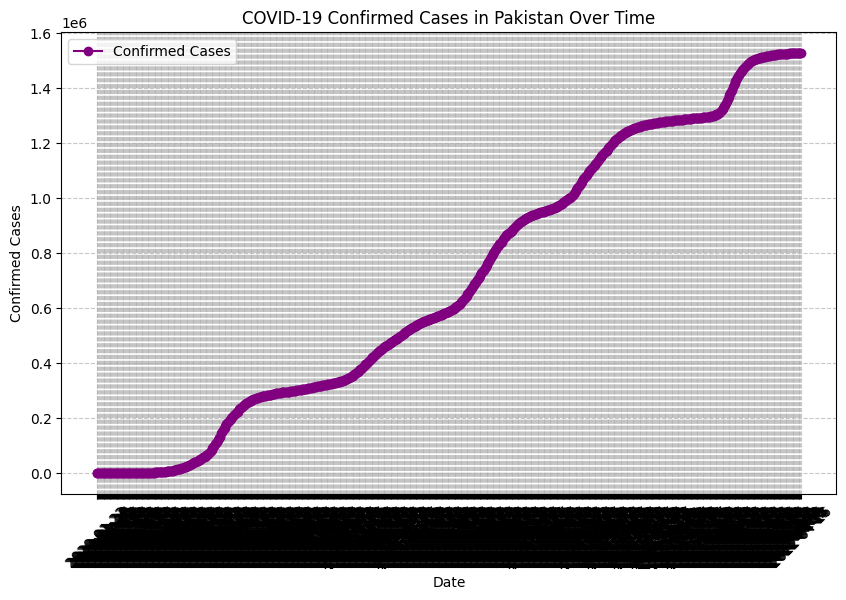

In [12]:
plt.figure(figsize=(10,6))
plt.plot(Pakistan_data["Date"], Pakistan_data["Confirmed"], marker='o', color="purple", label="Confirmed Cases")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("COVID-19 Confirmed Cases in Pakistan Over Time")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

**ACTIVITY 5**

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
data = {
    "Name": ["Ahsan", "Hira", "Bilal", "Zara", "Salman", "Mahnoor"],
    "Age": [25, 27, 35, 29, None, 40],
    "Salary": [50000, None, 75000, 2000000, 60000, 90000],
    "Department": ["IT", "Finance", "IT", "HR", "Finance", "IT"]
}
df = pd.DataFrame(data)
print("Original Data:\n", df)


Original Data:
       Name   Age     Salary Department
0    Ahsan  25.0    50000.0         IT
1     Hira  27.0        NaN    Finance
2    Bilal  35.0    75000.0         IT
3     Zara  29.0  2000000.0         HR
4   Salman   NaN    60000.0    Finance
5  Mahnoor  40.0    90000.0         IT


In [14]:
df["Age"].fillna(df["Age"].median(), inplace=True)       
df["Salary"].fillna(df["Salary"].mean(), inplace=True)   
print("\nAfter Handling Missing Values:\n", df)


After Handling Missing Values:
       Name   Age     Salary Department
0    Ahsan  25.0    50000.0         IT
1     Hira  27.0   455000.0    Finance
2    Bilal  35.0    75000.0         IT
3     Zara  29.0  2000000.0         HR
4   Salman  29.0    60000.0    Finance
5  Mahnoor  40.0    90000.0         IT


C:\Users\PMLS\AppData\Local\Temp\ipykernel_14632\2815608166.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\PMLS\AppData\Local\Temp\ipykernel_14632\2815608166.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [15]:
le = LabelEncoder()
df["Department_encoded"] = le.fit_transform(df["Department"])
print("\nEncoded Department:\n", df[["Department", "Department_encoded"]])


Encoded Department:
   Department  Department_encoded
0         IT                   2
1    Finance                   0
2         IT                   2
3         HR                   1
4    Finance                   0
5         IT                   2


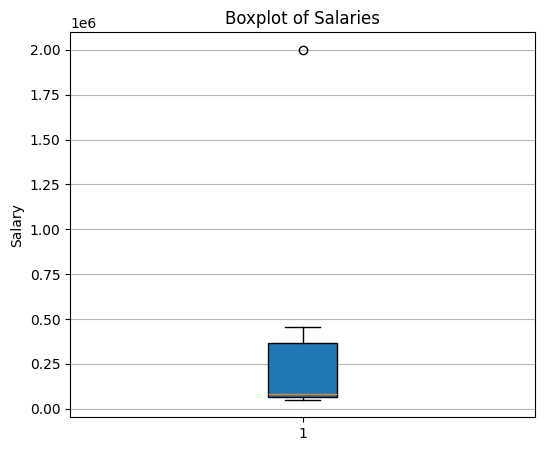

In [16]:
plt.figure(figsize=(6,5))
plt.boxplot(df["Salary"], patch_artist=True)
plt.title("Boxplot of Salaries")
plt.ylabel("Salary")
plt.grid(axis="y",  alpha=0.9)
plt.show()

In [17]:
Q1 = df["Salary"].quantile(0.25)
Q3 = df["Salary"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Salary"] < lower_bound) | (df["Salary"] > upper_bound)]
print("\nOutliers Detected:\n", outliers)


Outliers Detected:
    Name   Age     Salary Department  Department_encoded
3  Zara  29.0  2000000.0         HR                   1
